Populating the interactive namespace from numpy and matplotlib
251/4045


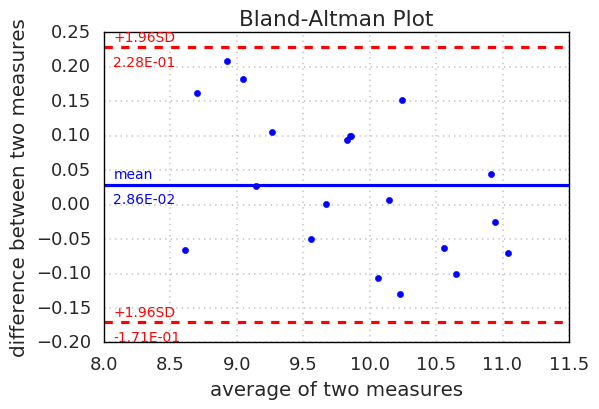

In [178]:
%run evaltools.ipynb

In [179]:
sns.set_style("whitegrid")
sns.set_context("talk")
sns.axes_style()
sns.set_style("whitegrid", {"axes.edgecolor": "0.0", "grid.linestyle": ":"})
# sns.set_context("paper")

In [180]:
datapath
df = read_data(datapath)

# this is going to remove unwanted data from the dataset

# df = select_df(df, older_than="2017-10-03 23:00", note="mix 2 cylinder surface + sphere error", remove=True, print_log=True)
df = select_df(df, older_than="2017-10-05 12:00", note_contains="mix 2", remove=True, print_log=True)
df = select_df(df, older_than="2017-10-05 17:00", note_contains="mix 4", remove=True, print_log=True)

3648/4045
3648/3648


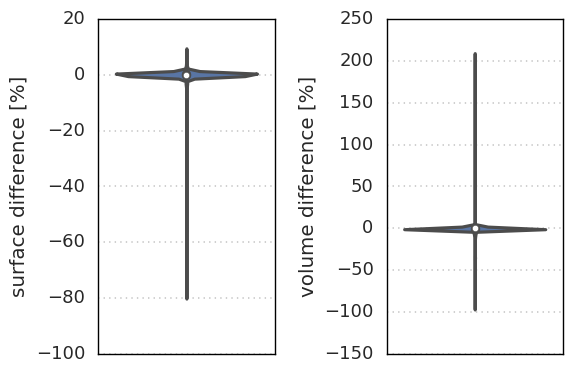

In [181]:
df_error = show_violin_separated(df)

In [182]:
# for k in df.keys():
#     print(k)

In [183]:
list_filter(df.keys(), contain="note")

['config output note']

# Wilcox a Spearman 


docela dobře vychází třeba experiment `mix 4 cylinder surface ` a  `mix 4 cylinder volume`

Nově se testuje velikost erroru, což je absolutní hodnota z difference. Pomocí Mann–Whitney–Wilcoxon (Wilcoxon rank-sum test) ověřujeme, že je medián erroru menší než 0.001.

In [184]:
mw_surf_key = "Wilcoxon Mann Whitney surface error < 0.1 %"
mw_vol_key = "Wilcoxon Mann Whitney vol error < 0.1 %"

maximal_error = 0.001
data = {
    "config output note": [],
    "wilcoxon volume": [],
    "spearman volume": [],
    "wilcoxon surface" : [],
    "spearman surface" : [],
    mw_surf_key: [],
    mw_vol_key: [],
    "number of samples": [],
    "surface mean err": [],
    "volume mean err": [],
#     "surface mean err test": [],
#     "volume mean err test": [],
#     "mannwhitneyu volume test": [],
#     "mannwhitneyu surface test": [],
}
for note in np.unique(df["config output note"]):
    dfs = df[df["config output note"] == note]
#     vw, vs, sw, ss = statistic_tests(dfs)
    sw, vw = wilcoxon_from_df(dfs)
    sm, vm = mannthitneyu_from_df(dfs)
    ss, vs = spearman_from_df(dfs)
    data["config output note"].append(note)
    data["wilcoxon volume"].append(vw.pvalue)
    data["spearman volume"].append(vs.pvalue)
    data["wilcoxon surface"].append(sw.pvalue)
    data["spearman surface"].append(ss.pvalue)
    data["number of samples"].append(len(dfs))
    
#     if len(dfs) > 3:
#         serrt = np.abs((dfs["surface [mm^2]"] - dfs["numeric surface [mm^2]"]) / dfs["surface [mm^2]"] )
#         verrt = np.abs((dfs["volume [mm^3]"] - dfs["numeric volume [mm^3]"]) / dfs["volume [mm^3]"] )
#         surf_sh = scipy.stats.mannwhitneyu(serrt, np.ones_like(serrt)*maximal_error, alternative="less")[1]
#         vol_sh = scipy.stats.mannwhitneyu(verrt, np.ones_like(verrt)*maximal_error, alternative="less")[1]
# #         surf_sh = np.mean(err)
# #         surf_sh = scipy.stats.shapiro(dfs["surface [mm^2]"] - dfs["numeric surface [mm^2]"])
#     else:
#         surf_sh = NaN
#         vol_sh = NaN
#         serrt = NaN
#         verrt = NaN
#     Wilcoxon–Mann–Whitney test
    data[mw_surf_key].append(sm)
    data[mw_vol_key].append(vm)
#     data["mannwhitneyu surface test"].append(surf_sh)
#     data["mannwhitneyu volume test"].append(vol_sh)
    data["surface mean err"].append(np.mean(dfs["surface error [-]"]))
    data["volume mean err"].append(np.mean(dfs["volume error [-]"]))
#     data["surface mean err test"].append(np.mean(serrt))
#     data["volume mean err test"].append(np.mean(verrt))
    
#     show_error(dfs, radius_method=note)
pd.set_option("display.max_rows",101)
pd.DataFrame(data)
pd.DataFrame(data)

,Wilcoxon Mann Whitney surface error < 0.1 %,Wilcoxon Mann Whitney vol error < 0.1 %,config output note,number of samples,spearman surface,spearman volume,surface mean err,volume mean err,wilcoxon surface,wilcoxon volume
0,2.439090e-02,1.000000e+00,compensation method 1 sphere cylinder surface,176,4.495098e-102,1.631674e-83,0.006397,0.019545,1.808256e-30,1.808256e-30
1,9.182861e-40,9.932706e-01,compensation method 1 sphere cylinder surface ...,175,6.914812e-123,4.234327e-101,0.000693,0.009893,5.558936e-23,1.939335e-29
2,9.309709e-01,6.224406e-14,compensation method 1 sphere cylinder volume,175,4.208930e-103,1.388799e-121,0.008033,0.002022,1.808256e-30,3.187138e-20
3,7.556557e-01,1.943776e-44,compensation method 1 sphere cylinder volume +...,175,9.630842e-99,6.914812e-123,0.008317,0.000953,1.808256e-30,8.655532e-13
4,1.000000e+00,1.000000e+00,compensation method 1 sphere inscribed,175,1.056327e-74,2.615000e-60,0.019180,0.037037,1.808256e-30,1.808256e-30
5,4.660141e-05,1.000000e+00,element number cylinder surface,49,3.265273e-06,3.265273e-06,0.001786,0.008149,1.047688e-09,1.047688e-09
6,3.628095e-11,9.044979e-01,element number cylinder surface + sphere error,49,3.265273e-06,3.265273e-06,0.000627,0.005983,1.183773e-03,1.047688e-09
7,9.679845e-02,9.679845e-02,element number cylinder surface + sphere error...,49,3.265273e-06,3.265273e-06,0.002849,0.002566,1.047688e-09,1.047688e-09
8,9.044979e-01,4.660141e-05,element number cylinder volume,49,3.265273e-06,3.265273e-06,0.004286,0.001067,1.047688e-09,1.047688e-09
9,9.980039e-01,3.059528e-18,element number cylinder volume + sphere error,91,1.134014e-10,1.134014e-10,0.004385,0.000614,1.057584e-16,2.675441e-16


## Vybrané experimenty

Následující experimenty vypadají obstojně.  `mix 4` testuje vždy jen jeden objekt. Navíc to má dobrá čísla objemu při kompenzaci povrchu.

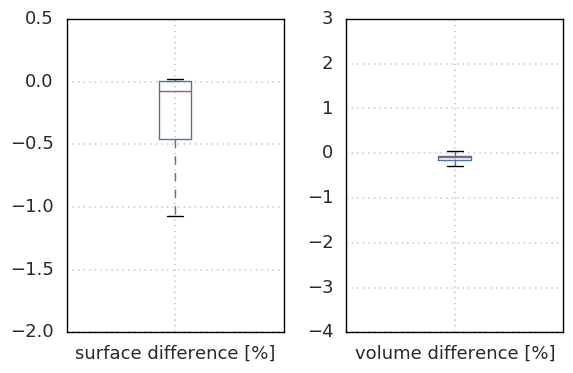

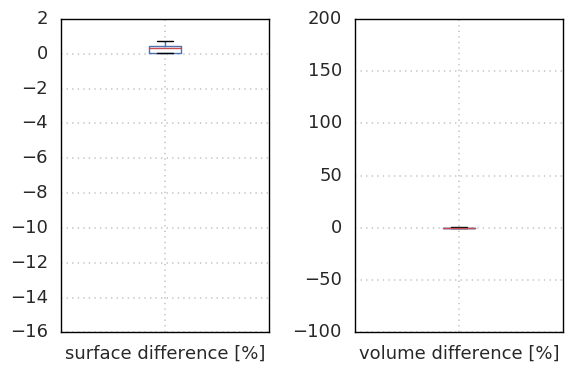

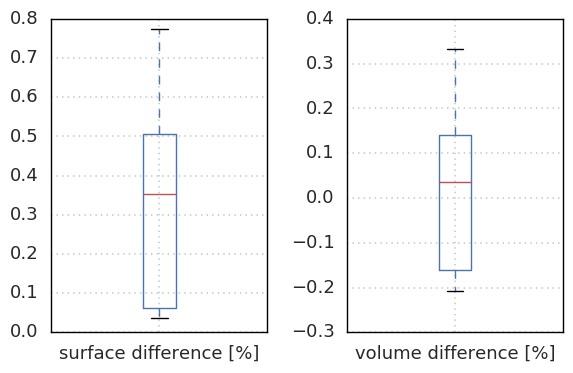

In [185]:

df_graph = show_box(select_df(df, "mix 2 cylinder surface + sphere error"))
df_graph = show_box(select_df(df, "mix 4 cylinder surface + sphere error"))
df_graph = show_box(select_df(df, "mix 6 cylinder surface + sphere error"))

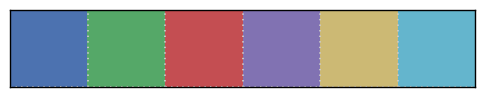

In [186]:

current_palette = sns.color_palette("deep")
sns.palplot(current_palette)
sns.set_palette(current_palette)

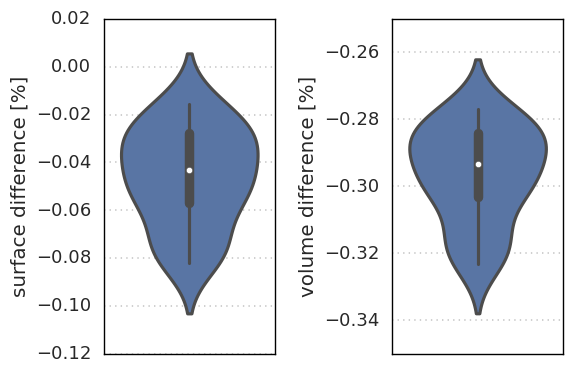

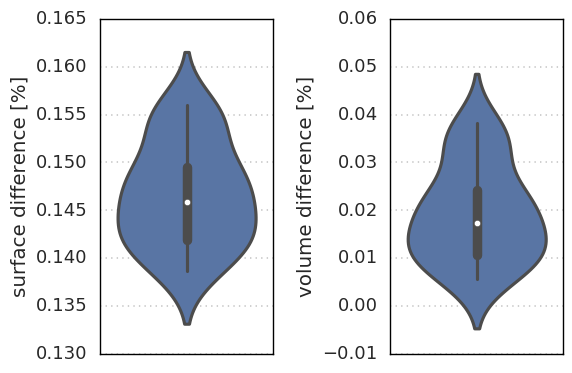

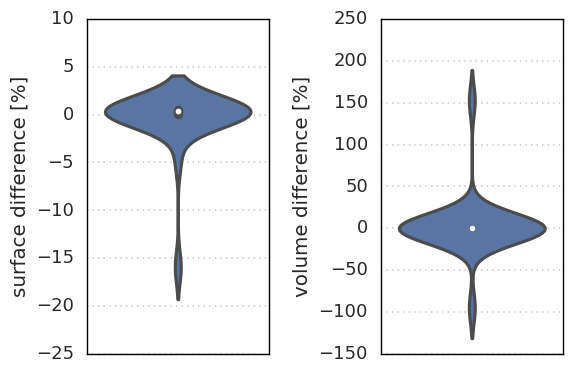

In [187]:

df_graph = show_violin_separated(select_df(df, "mix 4 cylinder surface"))
plt.figure()
df_graph = show_violin_separated(select_df(df, "mix 4 cylinder volume"))
plt.figure()
df_graph = show_violin_separated(select_df(df, "mix 4 cylinder surface + sphere error"))

# Object number

50/66
51/66
36/36


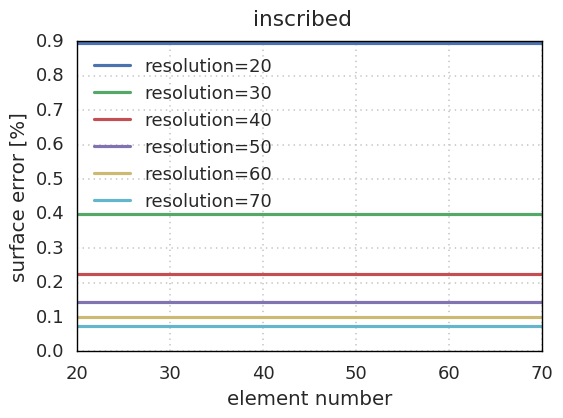

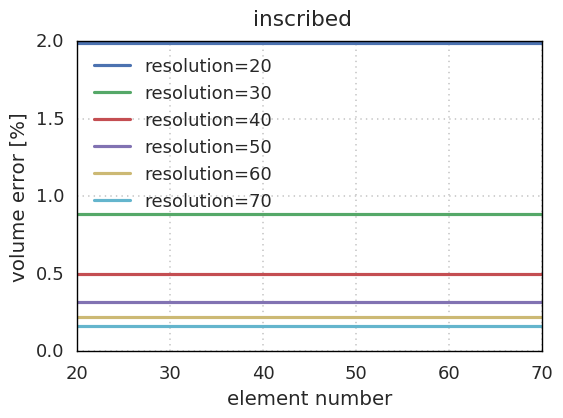

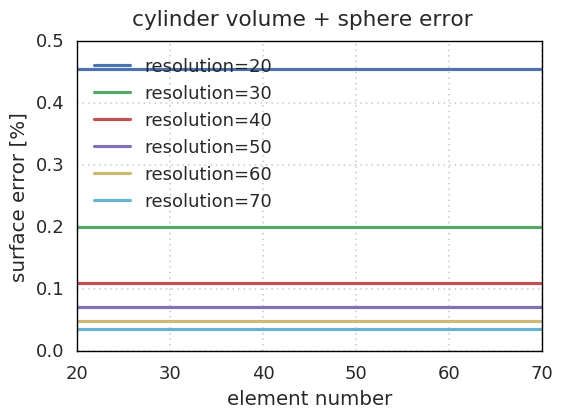

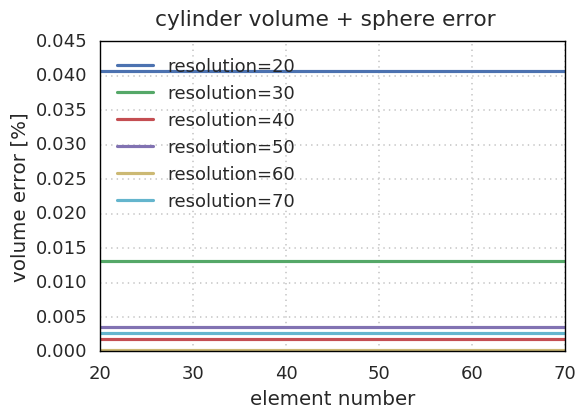

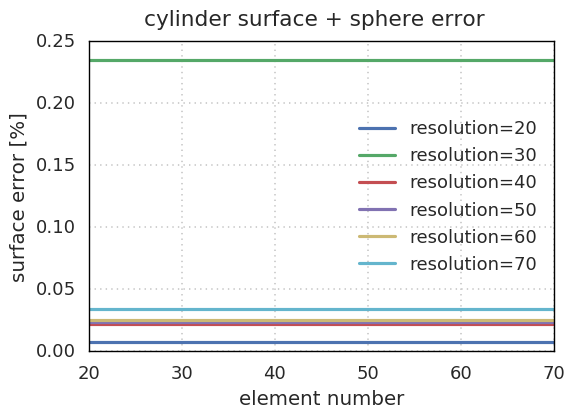

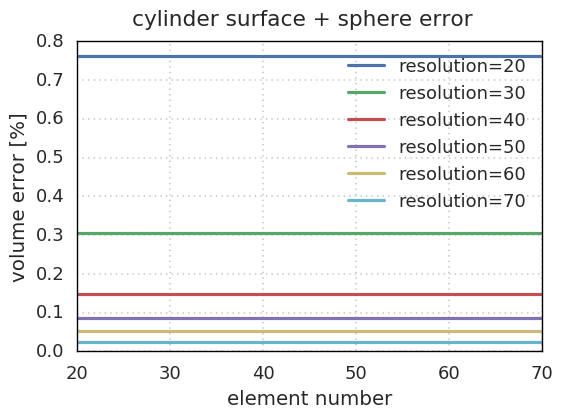

In [188]:
dpi = paper_dpi
date = "2017-10-05 21:00"
# for radius_method in available_radius_methods:
for radius_method in [
    "inscribed",
    "cylinder volume + sphere error",
    "cylinder surface + sphere error",
]:
    dfs = df[
        df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
    ]
    dfs = dfs[dfs["measurement resolution"] > 10]
    dfs = dfs[dfs["element number"] > 10]
    l1 = len(dfs)
    dfs = newer_data(dfs, date)
    print("{}/{}".format(len(dfs), l1))
    if len(dfs) < 1:
        continue

    # surface
    ykey="surface error [mm^2]"
    ykey="surface error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")
    sns.set_context("talk")
    fig, ax = plt.subplots(
#         figsize=(5,3)
    )
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        #dfi.plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    plt.suptitle(radius_method)
    fn = "../graphics/sensitivity_element_number_surface_" + radius_method 
    savefig(fn, dataframe=dfs)
#     plt.savefig(fn + ".pdf", bbox_inches='tight')
#     plt.savefig(fn + ".png", bbox_inches='tight', dpi=dpi)
    
    # volume
    ykey="volume error [mm^3]"
    ykey="volume error [%]"
    dfs_group = dfs[["element number", "measurement_resolution", ykey]].sort_values(by="element number").groupby(by="measurement_resolution")
    # .plot(x="element_number")

    fig, ax = plt.subplots(
#         figsize=(5,3)
    )
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
    for label, dfi in dfs_group:
        dfi.groupby(by="element number").mean().reset_index().plot(x="element number", y=ykey, ax=ax, label="resolution={}".format(label))
    #    df.vals.plot(x="element_number", ax=ax, label=label)
    #plt.legend()
    plt.ylabel(ykey)
    plt.suptitle(radius_method)
    fn = "../graphics/sensitivity_element_number_volume_" + radius_method 
    savefig(fn, dataframe=dfs)
#     plt.savefig(fn + ".pdf", bbox_inches='tight')
#     plt.savefig(fn + ".png", bbox_inches='tight', dpi=dpi)

In [189]:
dfs["volume error [%]"]

5683    0.761778
5693    0.306119
5703    0.148341
5713    0.086744
5723    0.052505
5733    0.025501
5753    0.761778
5763    0.306119
5773    0.148341
5783    0.086744
5793    0.052505
5803    0.025501
5823    0.761778
5833    0.306119
5843    0.148341
5853    0.086744
5863    0.052505
5873    0.025501
5893    0.761778
5903    0.306119
5913    0.148341
5923    0.086744
5933    0.052505
5943    0.025501
5963    0.761778
5973    0.306119
5983    0.148341
5993    0.086744
6003    0.052505
6013    0.025501
6033    0.761778
6043    0.306119
6053    0.148341
6063    0.086744
6073    0.052505
6083    0.025501
Name: volume error [%], dtype: float64

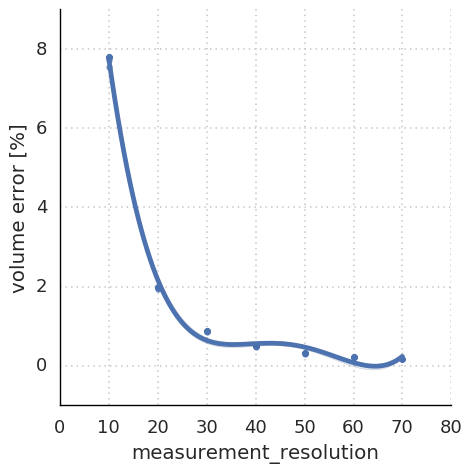

In [190]:
radius_method = "inscribed"
dfs = df[
    df[note_key] == "element number " + radius_method
        # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
]
k1 = "volume error [%]"
k2 = "measurement_resolution"

k2 in dfs.keys()
sns.lmplot(y=k1, x=k2, data=dfs, order=4, 
           truncate=True
           
#            logx=True
          )

## Analytic vs numeric

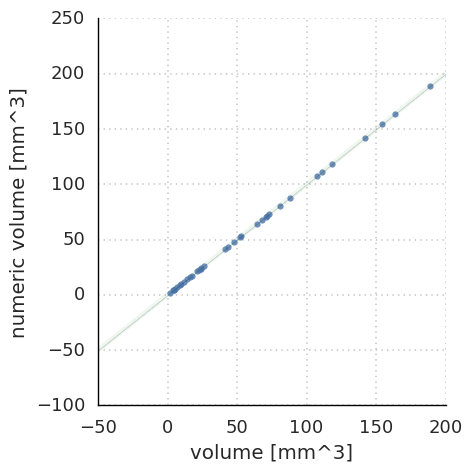

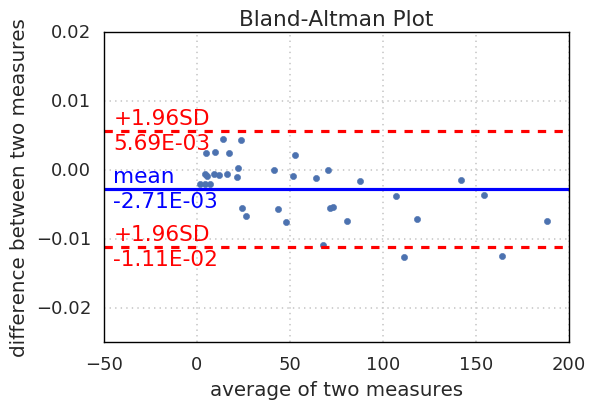

In [191]:

# notec = "element number"
# notec = "mix 4"
notec = "proof mix"
def show_anal_vs_num(dfs, x, y, fn):
    sns.lmplot(data=dfs, x=x, y=y, line_kws={"c":sns.color_palette()[1], "alpha":0.1})
    # sns.lmplot(data=dfs, x="volume [mm^3]", y="numeric volume [mm^3]")
    savefig(fn)

    plt.figure()
    bland_altman_plot(dfs[x], dfs[y], c=sns.color_palette()[0])
#     plt.suptitle("Bland-Altman plot")
    savefig(fn + "_bland_altman")
    
fn = "../graphics/num_volume_to_anal_volume"
x = "volume [mm^3]"
y = "numeric volume [mm^3]"
dfs = select_df(df, note=notec + " cylinder volume + sphere error")
dfs = dfs[dfs["measurement resolution"] > 20]
show_anal_vs_num(dfs, x, y, fn)


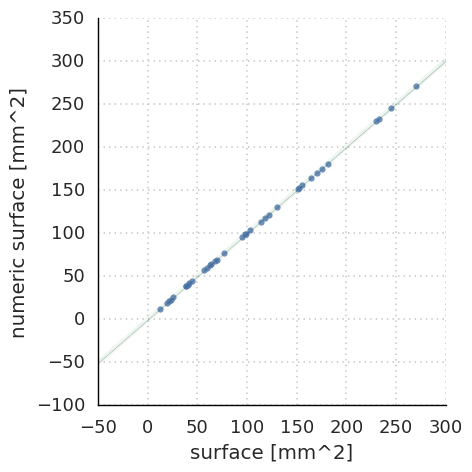

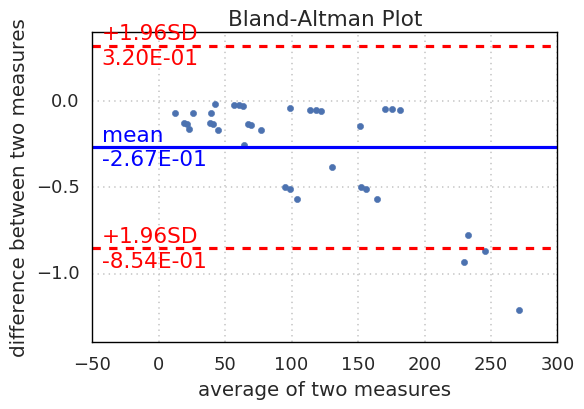

In [192]:
x="surface [mm^2]"
y="numeric surface [mm^2]"
fn = "../graphics/num_surface_to_anal_surface"
dfs_surface = select_df(df, note=notec + " cylinder surface + sphere error")
show_anal_vs_num(dfs_surface, x, y, fn)

# sns.lmplot(data=dfs, x="surface [mm^2]", y="numeric surface [mm^2]", line_kws={"c":sns.color_palette()[1], "alpha":0.1})
# # sns.lmplot(data=dfs, x="volume [mm^3]", y="numeric volume [mm^3]")
# savefig("../graphics/num_surface_to_anal_surface")

## Boxplot

fousy jsou 1.5 násobkem IQR interquartile range

Box represents two quartile Q1 to quartile Q3 separated by the median. Whiskers are Q1 - 1.5 * (Q3 - Q1) and Q3 + 1.5 * (Q3-Q1).

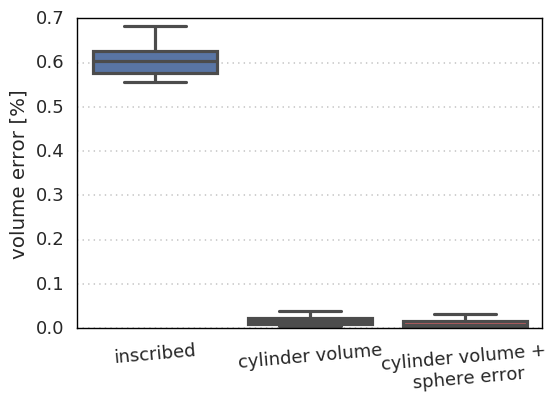

In [193]:
# notec = "element number"
dfs = select_df(df, note_contains=notec)
dfs = select_df(dfs, note_contains="surface", remove=True)
dfs = select_df(dfs, note_contains="join", remove=True)
dfs = dfs[dfs["measurement resolution"] > 20]
# dfs = select_df(dfs, note_contains="mix 4", remove)
g = sns.boxplot(data=dfs, y="volume error [%]", x="radius method", showfliers=False)
labels = [mtext.get_text() for mtext in g.get_xticklabels()]

# pn = labels[2].find("+") 
labels[2] = "cylinder volume +\n sphere error"
g.set_xticklabels(labels, rotation=5)
# g.set_xlabel = "compensation method"
# g.set_xlabel("measurement compensation method")
plt.xlabel("")
fn = "../graphics/boxplot_volume"
savefig(fn, dataframe=dfs)

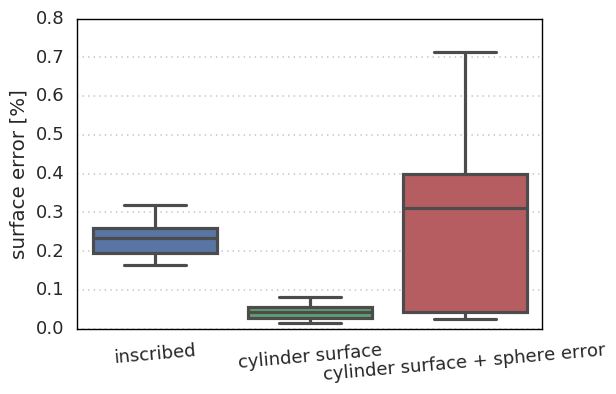

In [194]:
dfs = select_df(df, note_contains=notec)
dfs = select_df(dfs, note_contains="volume", remove=True)
dfs = select_df(dfs, note_contains="join", remove=True)
dfs = dfs[dfs["measurement resolution"] > 20]
# dfs = select_df(dfs, note_contains="mix 4", remove)
g = sns.boxplot(data=dfs, y="surface error [%]", x="radius method", showfliers=False)
labels = [mtext.get_text() for mtext in g.get_xticklabels()]
# labels[2] = "cylinder volume +\n sphere error"
g.set_xticklabels(labels, rotation=5)
plt.xlabel("")
fn = "../graphics/boxplot_surface"
savefig(fn, dataframe=dfs)

In [195]:
uu = g.get_xticklabels()
mtext = uu[0]
mtext.get_text()

u'inscribed'

### Bland-Altman plot



In [196]:
# bland_altman_plot

In [197]:
sns.color_palette()[1]

(0.3333333333333333, 0.6588235294117647, 0.40784313725490196)

# Error and measurement resolution

162/189


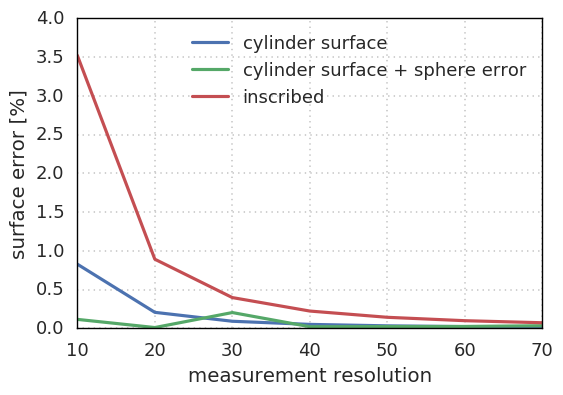

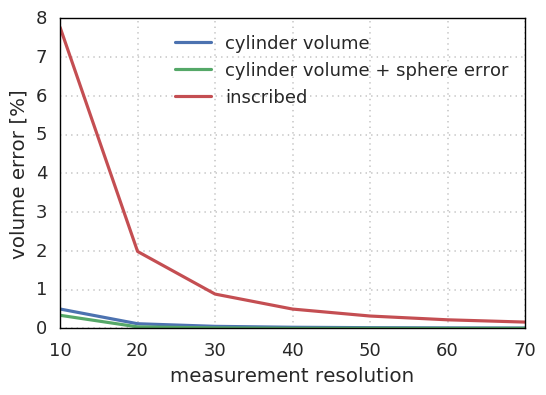

In [198]:
# zip(list(dfs_group))

# for radius_method in available_radius_methods:
# radius_method = "inscribed"
# dfs = df[
#     df[note_key] == "element number " + radius_method
#     # df["generators Unconnected cylinders radius_distribution_mean"] == 5 
# ]
dfs = select_df(df, note_contains="element number ")
dfs = select_df(dfs, note_contains="join", remove=True)
dfs = select_df(dfs, note_contains="volume", remove=True)
l1 = len(dfs)
dfs = newer_data(dfs, date)
print("{}/{}".format(len(dfs), l1))
if len(dfs) < 1:
    print "blbe"
#     continue
xkey="measurement resolution"
ykey="surface error [%]"
# .plot(x="element_number")
sns.set_context("talk")

dfs_group = dfs[[ykey, xkey, note_key]].sort_values(by=xkey).groupby(by=note_key)
fig, ax = plt.subplots(
#         figsize=(5,3)
)
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
for label, dfi in dfs_group:
    dfi.groupby(by=xkey).mean().abs().reset_index().plot(x=xkey, y=ykey, ax=ax, label="{}".format(label[15:]))
plt.ylabel(ykey)
plt.xlabel(xkey)
fn = "../graphics/sensitivity_surface_error_to_measurement_resolution"
savefig(fn, dataframe=dfs)


# dfs_group.plot(x=xkey, y=ykey)
xkey="measurement resolution"
ykey="volume error [%]"
# .plot(x="element_number")
sns.set_context("talk")

dfs = select_df(df, note_contains="element number ")
dfs = select_df(dfs, note_contains="join", remove=True)
dfs = select_df(dfs, note_contains="surface", remove=True)
dfs_group = dfs[[ykey, xkey, note_key]].sort_values(by=xkey).groupby(by=note_key)
fig, ax = plt.subplots(
#         figsize=(5,3)
)
    # dfs_group.plot(x="element_number", y="surface error [%]", ax=ax)
for label, dfi in dfs_group:
    dfi.groupby(by=xkey).mean().abs().reset_index().plot(x=xkey, y=ykey, ax=ax, label="{}".format(label[15:]))
plt.ylabel(ykey)
plt.xlabel(xkey)
fn = "../graphics/sensitivity_volume_error_to_measurement_resolution"
savefig(fn, dataframe=dfs)

In [199]:
# sns.lmplot(data=dfs, x="measurement resolution", y="volume error [%]", hue=note_key, order=1, logx=True)
# dfs

In [200]:
# dfi.groupby(by="measurement_resolution").mean().abs().reset_index().plot(x=xkey, y=ykey, ax=ax, label="resolution={}".format(label))
# dfi

In [201]:

# dfs_group = dfs[["surface error [%]", "measurement_resolution" ]].sort_values(by="measurement_resolution")#.groupby(by="surface error")
# dfs_group
# label
# dfi

# Porosity

http://home.zcu.cz/~mjirik/lisa/teigen/teigen_porosity_001.zip

# Volume fraction data

In [202]:
dfs = select_df(df, note_contains= "volume fraction")
# dfs = df[
#     df[note_key] == "volume fraction overlap inscribed"
# ]
# np.unique(df[note_key])
dfs["numeric volume [mm^3]"]
print(list_filter(dfs.keys(), contain="area"))

# print(list_filter(dfs.keys(), contain="frac"))
volume_fraction = dfs["numeric volume [mm^3]"] / dfs["measurement area volume [mm^3]"]
dfs["volume fraction"] = volume_fraction
print(volume_fraction)
dfs[[note_key, "volume fraction"]]

['config areasampling areasize_mm', 'config areasampling areasize_px', 'config areasampling voxelsize_mm', 'measurement area volume [mm^3]']
3951    0.795136
5591    0.480873
5592    0.480873
5593    0.480873
5594    0.480873
5595    0.480873
5596    0.480873
5597    0.480873
5598    0.480873
dtype: float64


/home/mjirik/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,config output note,volume fraction
3951,volume fraction overlap inscribed,0.795136
5591,volume fraction overlap 4 inscribed,0.480873
5592,volume fraction overlap 4 inscribed,0.480873
5593,volume fraction overlap 4 inscribed,0.480873
5594,volume fraction overlap 4 inscribed,0.480873
5595,volume fraction overlap 4 inscribed,0.480873
5596,volume fraction overlap 4 inscribed,0.480873
5597,volume fraction overlap 4 inscribed,0.480873
5598,volume fraction overlap 4 inscribed,0.480873


## volume fraction 34% 

ke stažení [zde](http://home.zcu.cz/~mjirik/lisa/teigen/teigen_volume_fraction_overlap__001.zip)
Tenhle má cca 1000 objektů a výpočet zabere kolem 5ti hodin. Ještě se snažím vytvořit větší zaplnění. Až se dostanu přes 50% vygeneruju i obrázky.

![fig](http://github.com/mjirik/teigen/blob/master/graphics/teigen_volume_fraction_34.png?raw=true)

# Computation info

In [203]:
id_of_requested_table = 0
dfcinfo = pd.read_html("hardinfo_report.html")[id_of_requested_table]
# df
dfcinfo[(dfcinfo[0] == "Operating System") | (dfcinfo[0] == "Memory") | (dfcinfo[0] == "Processor")]
# memory_str = df[df[0] == "Memory" ].iloc[0][1]
# memory_str[0:memory_str.find(" (")]

,0,1
2,Processor,4x Intel(R) Core(TM) i5-2520M CPU @ 2.50GHz
3,Memory,8129MB (4283MB used)
4,Operating System,Ubuntu 16.04.3 LTS


In [204]:
import imtools
import imtools.dili as dili
dfs = select_df(df, note_contains="generated")
req_keys = list(dili.list_contains(dfs.keys(), "time [s]"))
req_keys.append(note_key)
dfsm = dfs[req_keys].groupby(by=note_key).agg(["min", "max", "mean", "std"])
display(dfsm)



step 1 time [s]  \
                                                               min   
config output note                                                   
generated volume element_number anisotropic ins...       38.067334   
generated volume isotropy inscribed                      80.243249   
generated volume length inscribed                        78.629314   
generated volume noise inscribed                         96.139334   
generated volume radius inscribed                         9.242478   
generated volume resolution_mm inscribed                 96.829405   

                                                                            \
                                                           max        mean   
config output note                                                           
generated volume element_number anisotropic ins...  943.498296  399.942898   
generated volume isotropy inscribed                  93.768053   90.037884   
generated volume length inscribed                    99.982460   87.964211   
generated volume noise inscribed                     97.079383   96.663124   
generated volume radius inscribed                   109.942790   75.716730   
generated volume resolution_mm inscribed            102.029161   97.574106   

                                                                \
                                                           std   
config output note                                               
generated volume element_number anisotropic ins...  301.944696   
generated volume isotropy inscribed                   4.094332   
generated volume length inscribed                     6.884682   
generated volume noise inscribed                      0.285720   
generated volume radius inscribed                    32.566072   
generated volume resolution_mm inscribed              1.538118   

                                                   step 2 time [s]  \
                                                               min   
config output note                                                   
generated volume element_number anisotropic ins...       18.566351   
generated volume isotropy inscribed                      24.964832   
generated volume length inscribed                        13.760947   
generated volume noise inscribed                         92.011967   
generated volume radius inscribed                        27.609752   
generated volume resolution_mm inscribed                  0.289337   

                                                                            \
                                                           max        mean   
config output note                                                           
generated volume element_number anisotropic ins...   77.062346   46.914479   
generated volume isotropy inscribed                 517.954692   63.729704   
generated volume length inscribed                   189.663245   34.923465   
generated volume noise inscribed                    160.093097  154.491107   
generated volume radius inscribed                   277.606368  123.353067   
generated volume resolution_mm inscribed            517.954692   34.890713   

                                                               total time [s]  \
                                                           std            min   
config output note                                                              
generated volume element_number anisotropic ins...   19.266408      56.633685   
generated volume isotropy inscribed                 107.140593     105.208081   
generated volume length inscribed                    41.636544      92.397705   
generated volume noise inscribed                     14.768321     188.151301   
generated volume radius inscribed                    98.997194     123.314850   
generated volume resolution_mm inscribed            118.328807      97.181585   

                                                          

In [205]:
dfsm.describe()

step 1 time [s]                                     step 2 time [s]  \
                  min         max        mean         std             min   
count        6.000000    6.000000    6.000000    6.000000        6.000000   
mean        66.525186  241.050024  141.316492   57.885603       29.533864   
std         35.273777  344.171197  126.944262  120.160975       32.101107   
min          9.242478   93.768053   75.716730    0.285720        0.289337   
25%         48.207829   97.805152   88.482629    2.177171       14.962298   
50%         79.436282  101.005810   93.350504    5.489507       21.765591   
75%         92.165313  107.964383   97.346360   26.145724       26.948522   
max         96.829405  943.498296  399.942898  301.944696       92.011967   

                                          total time [s]               \
              max        mean         std            min          max   
count    6.000000    6.000000    6.000000       6.000000     6.000000   
mean   290.055740   76.383756   66.689644     110.481201   521.523847   
std    187.811597   50.549117   46.731371      43.883027   291.714889   
min     77.062346   34.890713   14.768321      56.633685   257.172480   
25%    167.485634   37.921219   24.858942      93.593675   291.161255   
50%    233.634807   55.322091   70.316869     101.194833   484.033341   
75%    457.867611  108.447226  105.104743     118.788158   613.362875   
max    517.954692  154.491107  118.328807     188.151301  1020.560642   

                               
             mean         std  
count    6.000000    6.000000  
mean   217.661168  113.462876  
std    121.951759  108.611204  
min    122.887676   14.880327  
25%    137.614653   51.317878  
50%    176.418692   92.145989  
75%    238.133122  115.573224  
max    446.857378  320.514139

## measurement resolution dependency

step 1 time [s]                                   \
                                     min         max      mean        std   
config output note                                                          
element number inscribed        0.761139  185.648213  59.91961  48.360153   

                         step 2 time [s]                                \
                                     min       max      mean       std   
config output note                                                       
element number inscribed        0.021872  0.509206  0.197092  0.134437   

                         total time [s]                                   
                                    min         max       mean       std  
config output note                                                        
element number inscribed       0.817495  186.053428  60.116702  48.43324

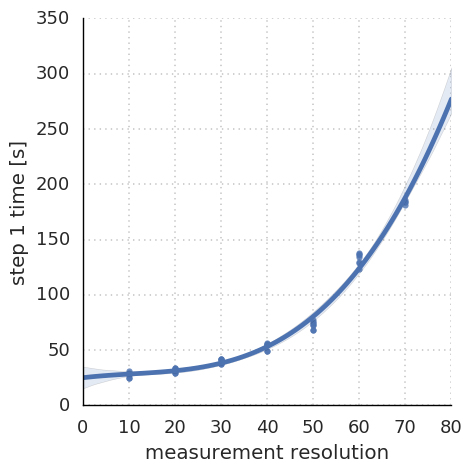

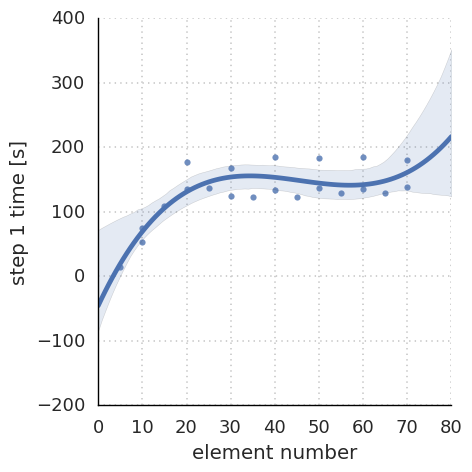

In [206]:
# element number inscribed
dfs = select_df(df, newer_than="2017-10-05", note="element number inscribed")
req_keys = list(dili.list_contains(dfs.keys(), "time [s]"))
req_keys.append(note_key)
dfsm = dfs[req_keys].groupby(by=note_key).agg(["min", "max", "mean", "std"])
display(dfsm)
# display(sns.lmplot(data=dfs, x="element number", y="processing_info step1_total_time_s"))
# display(sns.lmplot(data=dfs[dfs["element number"] == 50], x="measurement_resolution", y="processing_info step1_total_time_s", order=3))
display(sns.lmplot(data=dfs[dfs["element number"] >= 40], x="measurement resolution", y="step 1 time [s]", order=3))
display(sns.lmplot(data=dfs[dfs["measurement resolution"] >= 60], x="element number", y="step 1 time [s]", order=3))
# dili.list_contains(dfs.keys(), "resolution")

# Dataset configuration

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
251/4045


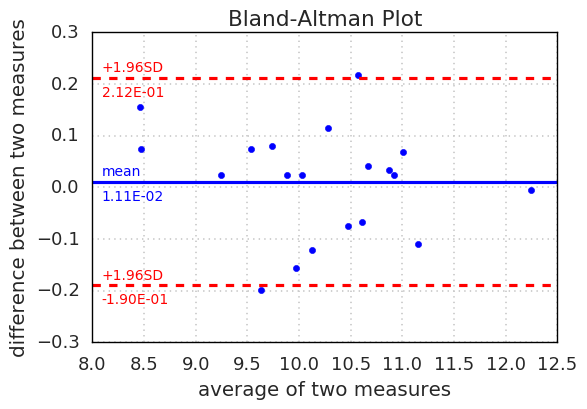

INFO:teigen.tgmain:Starting Teigen
INFO:teigen.tgmain:Starting Teigen


/home/mjirik/projects/teigen
['/home/mjirik/projects/teigen/teigen']


In [207]:
%run paper_experiments_params.ipynb
config = get_paper_config()


In [208]:
import pprint
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(config)

# def sprint(structure, indent=):
#     for item in structure

OrderedDict([('generators', OrderedDict([('Voronoi tubes', OrderedDict([('element_number', 30), ('radius_distribution_uniform', True), ('radius_distribution_normal', False), ('radius_distribution_fixed', False), ('radius_distribution_minimum', 2.0), ('radius_distribution_maximum', 10.0), ('radius_distribution_mean', 5.0), ('radius_distribution_standard_deviation', 5.0), ('random_generator_seed', 0)])), ('Gensei', OrderedDict([('n_objects', 10)])), ('Continuous tubes', OrderedDict([('element_number', 30), ('radius_distribution_uniform', True), ('radius_distribution_normal', False), ('radius_distribution_fixed', False), ('radius_distribution_minimum', 2.0), ('radius_distribution_maximum', 10.0), ('radius_distribution_mean', 5.0), ('radius_distribution_standard_deviation', 5.0), ('random_generator_seed', 0)])), ('Unconnected tubes', OrderedDict([('element_number', 30), ('radius_distribution_uniform', False), ('radius_distribution_normal', True), ('radius_distribution_fixed', False), ('rad

In [209]:
# Analytic to numeric 